In [14]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/C34-1522.csv')
dfMunicipios = pd.read_csv('../data/MUNICSBR.csv')
dfHospitais = pd.read_csv('../data/CNESBR.csv')

#Subsitui os códigos de Municipios e Hospitais pelos seus nomes
df['MUNIC_RES'] = df['MUNIC_RES'].map(dfMunicipios.set_index('COD')['MUNIC'])
df['CNES'] = df['CNES'].map(dfHospitais.set_index('CNES')['NOMEFANT'])
df.head(5)

UF_ZI  ANO_CMPT  MES_CMPT  ESPEC      CGC_HOSP          N_AIH  IDENT  \
0  230000      2015         1      3  5.268526e+12  2314100097419      1   
1  230000      2015         1      3  5.268526e+12  2314100097420      1   
2  230000      2015         1      3  5.268526e+12  2314100097430      1   
3  230000      2015         1      3  5.268526e+12  2314100096649      1   
4  230000      2015         1      3  5.268526e+12  2314100199081      1   

        CEP              MUNIC_RES      NASC  ...  DIAGSEC9  TPDISEC1  \
0  60811450          FORTALEZA, CE  19411112  ...       NaN         0   
1  60811450          FORTALEZA, CE  19411112  ...       NaN         0   
2  60811450          FORTALEZA, CE  19411112  ...       NaN         0   
3  62908000             RUSSAS, CE  19600114  ...       NaN         0   
4  63010000  JUAZEIRO DO NORTE, CE  19490715  ...       NaN         0   

   TPDISEC2  TPDISEC3  TPDISEC4  TPDISEC5  TPDISEC6  TPDISEC7  TPDISEC8  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   TPDISEC9  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 113 columns]

In [3]:
dfHospitalMessejana = df[df['CNES'] == 'HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUDART GOMES']
dfHospitalMessejana.head(5)

UF_ZI  ANO_CMPT  MES_CMPT  ESPEC      CGC_HOSP          N_AIH  IDENT  \
15  230440      2015         1      3  7.954571e+12  2314103898491      1   
16  230440      2015         1      3  7.954571e+12  2314105058628      1   
17  230440      2015         1      3  7.954571e+12  2314104992408      1   
18  230440      2015         1      3  7.954571e+12  2314104995191      1   
19  230440      2015         1      3  7.954571e+12  2314104031866      1   

         CEP      MUNIC_RES      NASC  ...  DIAGSEC9  TPDISEC1  TPDISEC2  \
15  60351060  FORTALEZA, CE  19310405  ...       NaN         0         0   
16  60812720  FORTALEZA, CE  19470602  ...       NaN         0         0   
17  60542000  FORTALEZA, CE  19610422  ...       NaN         0         0   
18  60351130  FORTALEZA, CE  19480724  ...       NaN         0         0   
19  60873550  FORTALEZA, CE  19561216  ...       NaN         0         0   

    TPDISEC3  TPDISEC4  TPDISEC5  TPDISEC6  TPDISEC7  TPDISEC8  TPDISEC9  
15         0         0         0         0         0         0         0  
16         0         0         0         0         0         0         0  
17         0         0         0         0         0         0         0  
18         0         0         0         0         0         0         0  
19         0         0         0         0         0         0         0  

[5 rows x 113 columns]

# Relação de Internações do Hospital de Messejana e Outros Hospitais

In [ ]:
totalInternacoesCeara = dfSemMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size().sum()
totalInternacoesMessejana = dfHospitalMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size().sum()
porcentagemMessejana = totalInternacoesMessejana/(totalInternacoesCeara+totalInternacoesMessejana)
porcentagemOutros = 1 - porcentagemMessejana
print("Porcentagem de internações do Hospital de Messejana: ", porcentagemMessejana)
print("Porcentagem de internações dos outros hospitais: ", porcentagemOutros)

Porcentagem de internações do Hospital de Messejana:  0.5748934775483449
Porcentagem de internações dos outros hospitais:  0.42510652245165514


Text(0.5, 1.0, 'Hospital de Messejana admissions per month from 2015 to 2022')

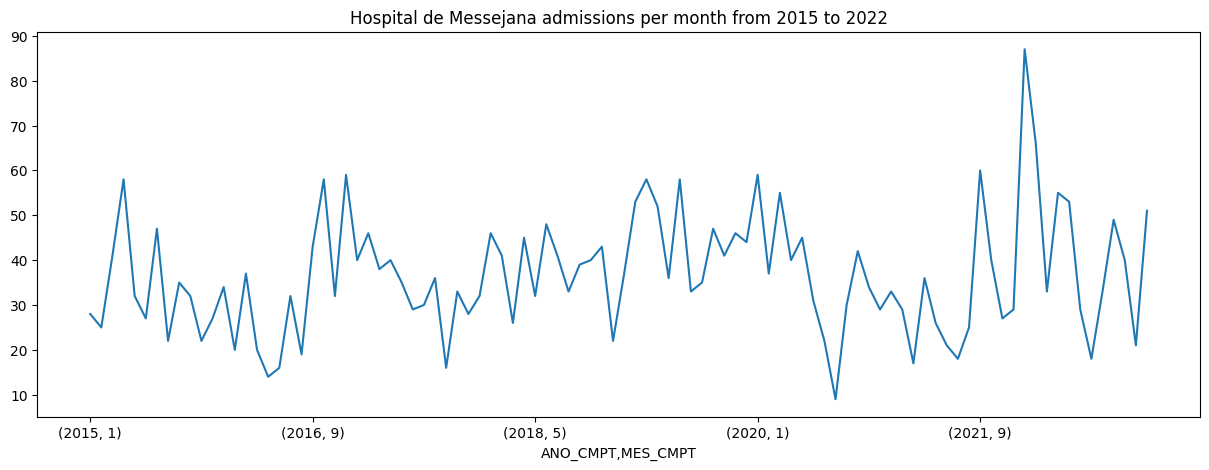

In [4]:
#Internações por mes no Hospital de Messejana de 2015 a 2022
dfHospitalMessejana.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
plt.title('Hospital de Messejana admissions per month from 2015 to 2022')

In [5]:
dfSemMessejana = df[df['CNES'] != 'HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUDART GOMES']

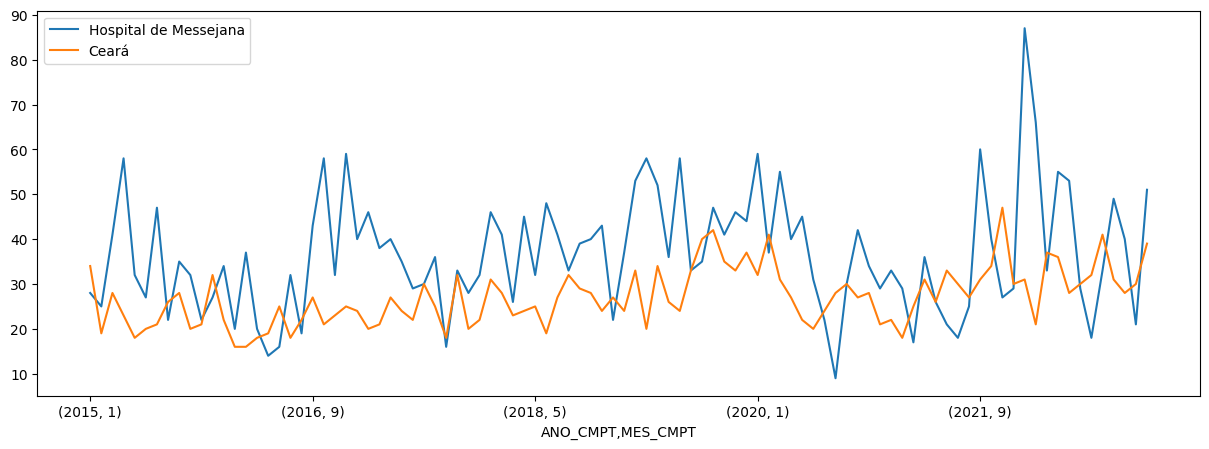

In [6]:
# Gráfico de 2 linha: uma com o total de internações por mes no hospital de messejana e outra com o total de internações por mes no Ceará sem o hospital de messejana
dfHospitalMessejana.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
dfSemMessejana.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
plt.legend(['Hospital de Messejana', 'Ceará'])

In [7]:
FiltroPrePandemia = [2015,2016,2017,2018,2019]
FiltroPandemia = [2020,2021]
FiltroPosPandemia = [2022]

filtroCirurgia = [416110010, 416110011, 416110012, 416110013, 416110014, 416110015, 416110016, 416110017, 416110018,
                  416110020, 416110021, 416110022, 416110023, 416110024, 416110025, 416110026, 416110027, 416110028,
                  416110030, 416110031, 416110032, 416110033, 416110034, 416110035, 416110036, 416110037, 416110038,
                  416110040, 416110041, 416110042, 416110043, 416110044, 416110045, 416110046, 416110047, 416110048,
                  416110050, 416110051, 416110052, 416110053, 416110054, 416110055, 416110056, 416110057, 416110058,
                  416110060, 416110061, 416110062, 416110063, 416110064, 416110065, 416110066, 416110067, 416110068,
                  416110070, 416110071, 416110072, 416110073, 416110074, 416110075, 416110076, 416110077, 416110078,
                  416110080, 416110081, 416110082, 416110083, 416110084, 416110085, 416110086, 416110087, 416110088]
# filtroInternacaoDomiciliar = [301050074]
filtroTratamentoClinico = [304100021, 303130067]
filtroIntercorrencia = [301060070, 301060088, 304100013]
filtroTotal = filtroTratamentoClinico + filtroIntercorrencia + filtroCirurgia # + filtroInternacaoDomiciliar

dfPrePandemia = dfSemMessejana[dfSemMessejana['ANO_CMPT'].isin(FiltroPrePandemia)]

dfCirurgia = df[df['PROC_REA'].isin(filtroCirurgia)]
dfTratamentoClinico = df[df['PROC_REA'].isin(filtroTratamentoClinico)]
dfIntercorrencia = df[df['PROC_REA'].isin(filtroIntercorrencia)]

# Rede Completa

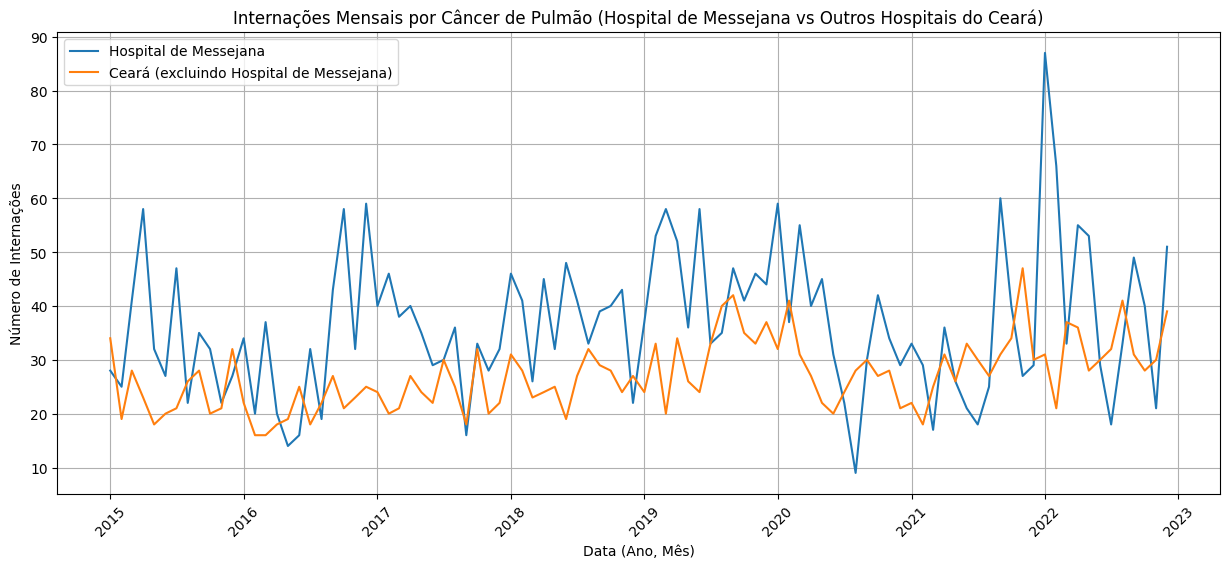

In [8]:
# Agrupando os dados para o Hospital de Messejana por ano e mês
messejana_mensal = dfHospitalMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size().reset_index(name='Internacoes')
messejana_mensal['Data'] = pd.to_datetime(messejana_mensal['ANO_CMPT'].astype(str) + '-' + messejana_mensal['MES_CMPT'].astype(str) + '-01')

# Agrupando os dados para outros hospitais do Ceará por ano e mês
outros_hospitais_mensal = dfSemMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size().reset_index(name='Internacoes')
outros_hospitais_mensal['Data'] = pd.to_datetime(outros_hospitais_mensal['ANO_CMPT'].astype(str) + '-' + outros_hospitais_mensal['MES_CMPT'].astype(str) + '-01')


plt.figure(figsize=(15, 6))
plt.plot(messejana_mensal['Data'], messejana_mensal['Internacoes'], label='Hospital de Messejana')
plt.plot(outros_hospitais_mensal['Data'], outros_hospitais_mensal['Internacoes'], label='Ceará (excluindo Hospital de Messejana)')
plt.title('Internações Mensais por Câncer de Pulmão (Hospital de Messejana vs Outros Hospitais do Ceará)')
plt.xlabel('Data (Ano, Mês)')
plt.ylabel('Número de Internações')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [9]:
messejana_mensal

ANO_CMPT  MES_CMPT  Internacoes       Data
0       2015         1           28 2015-01-01
1       2015         2           25 2015-02-01
2       2015         3           41 2015-03-01
3       2015         4           58 2015-04-01
4       2015         5           32 2015-05-01
..       ...       ...          ...        ...
91      2022         8           33 2022-08-01
92      2022         9           49 2022-09-01
93      2022        10           40 2022-10-01
94      2022        11           21 2022-11-01
95      2022        12           51 2022-12-01

[96 rows x 4 columns]

In [10]:
outros_hospitais_mensal

ANO_CMPT  MES_CMPT  Internacoes       Data
0       2015         1           34 2015-01-01
1       2015         2           19 2015-02-01
2       2015         3           28 2015-03-01
3       2015         4           23 2015-04-01
4       2015         5           18 2015-05-01
..       ...       ...          ...        ...
91      2022         8           41 2022-08-01
92      2022         9           31 2022-09-01
93      2022        10           28 2022-10-01
94      2022        11           30 2022-11-01
95      2022        12           39 2022-12-01

[96 rows x 4 columns]

In [11]:
messejana_mensal = dfHospitalMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size()
outros_hospitais_mensal = dfSemMessejana.groupby(['ANO_CMPT', 'MES_CMPT']).size()

periodos = {
    '2015': [2015],
    '2016': [2016],
    '2017': [2017],
    '2018': [2018],
    '2019': [2019],
    '2020': [2020],
    '2021': [2021],
    '2022': [2022]
}

# Correlação para cada período
correlacoes = {}
for periodo, anos in periodos.items():
    messejana_periodo = messejana_mensal[messejana_mensal.index.get_level_values('ANO_CMPT').isin(anos)]
    outros_hospitais_periodo = outros_hospitais_mensal[outros_hospitais_mensal.index.get_level_values('ANO_CMPT').isin(anos)]
    correlacao = messejana_periodo.corr(outros_hospitais_periodo)
    correlacoes[periodo] = correlacao

correlacoes

{'2015': -0.06298652881888628,
 '2016': 0.33486772670004017,
 '2017': 0.20618245254776743,
 '2018': -0.12984389166559812,
 '2019': -0.3130175720790977,
 '2020': 0.26745476192829315,
 '2021': 0.08941475884841502,
 '2022': -0.2463613376692487}

In [12]:
# Filtrando os dados para os anos pré-pandemia (2015-2019) e pandemia (2020-2021)
pre_pandemia = dfSemMessejana[dfSemMessejana['ANO_CMPT'].isin(range(2015, 2020))]
durante_pandemia = dfSemMessejana[dfSemMessejana['ANO_CMPT'].isin([2020, 2021])]

# Agrupando as internações por hospital
internacoes_pre_pandemia = pre_pandemia.groupby('CNES').size()
internacoes_durante_pandemia = durante_pandemia.groupby('CNES').size()

# Comparando os números de internações
comparacao_hospitais = pd.DataFrame({
    'Internacoes_Pre_Pandemia': internacoes_pre_pandemia,
    'Internacoes_Durante_Pandemia': internacoes_durante_pandemia
})

# Calculando a diferença nas internações
comparacao_hospitais['Diferenca'] = comparacao_hospitais['Internacoes_Durante_Pandemia'] - comparacao_hospitais['Internacoes_Pre_Pandemia']

# Filtrando hospitais com aumento significativo de internações
hospitais_aumento_significativo = comparacao_hospitais[comparacao_hospitais['Diferenca'] > 0].sort_values(by='Diferenca', ascending=False)

hospitais_aumento_significativo.head(10)  # Mostrando os top 10 hospitais com maior aumento


Internacoes_Pre_Pandemia  \
CNES                                                                           
HOSPITAL DISTRITAL DR FERNANDES TAVORA                                   7.0   
SANTA CASA DE MORADA NOVA                                                7.0   
HOSPITAL MUNICIPAL DR EUDASIO BARROSO HMEB                               2.0   
HOSPITAL MUNICIPAL E MATERNIDADE SAO JOSE                                3.0   
HOSPITAL MUNICIPAL SENADOR CARLOS JEREISSATI                             4.0   
INSTITUTO PRAXIS                                                         4.0   
HOSPITAL REGIONAL DE ICO DEPUTADO ORIEL GUIMARA...                       2.0   
HOSPITAL REGIONAL DO CARIRI                                             18.0   

                                                    Internacoes_Durante_Pandemia  \
CNES                                                                               
HOSPITAL DISTRITAL DR FERNANDES TAVORA                                      21.0   
SANTA CASA DE MORADA NOVA                                                   11.0   
HOSPITAL MUNICIPAL DR EUDASIO BARROSO HMEB                                   4.0   
HOSPITAL MUNICIPAL E MATERNIDADE SAO JOSE                                    5.0   
HOSPITAL MUNICIPAL SENADOR CARLOS JEREISSATI                                 6.0   
INSTITUTO PRAXIS                                                             6.0   
HOSPITAL REGIONAL DE ICO DEPUTADO ORIEL GUIMARA...                           3.0   
HOSPITAL REGIONAL DO CARIRI                                                 19.0   

                                                    Diferenca  
CNES                                                           
HOSPITAL DISTRITAL DR FERNANDES TAVORA                   14.0  
SANTA CASA DE MORADA NOVA                                 4.0  
HOSPITAL MUNICIPAL DR EUDASIO BARROSO HMEB                2.0  
HOSPITAL MUNICIPAL E MATERNIDADE SAO JOSE                 2.0  
HOSPITAL MUNICIPAL SENADOR CARLOS JEREISSATI              2.0  
INSTITUTO PRAXIS                                          2.0  
HOSPITAL REGIONAL DE ICO DEPUTADO ORIEL GUIMARA...        1.0  
HOSPITAL REGIONAL DO CARIRI                               1.0

In [15]:
# Agrupando as internações por hospital e ano para o DataFrame que exclui o Hospital de Messejana
internacoes_por_ano_hospital = df.groupby(['CNES', 'ANO_CMPT']).size().unstack(fill_value=0)

# Ordenando os hospitais pelo total de internações durante o período
internacoes_por_ano_hospital['Total'] = internacoes_por_ano_hospital.sum(axis=1)
internacoes_por_ano_hospital_sorted = internacoes_por_ano_hospital.sort_values(by='Total', ascending=False)

# Removendo a coluna total para melhor visualização dos resultados anuais
internacoes_por_ano_hospital_sorted.drop(columns=['Total'], inplace=True)

internacoes_por_ano_hospital_sorted.head(20)



ANO_CMPT                                            2015  2016  2017  2018  \
CNES                                                                         
HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUD...   396   384   403   456   
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP       11    14    22    32   
HOSPITAL HAROLDO JUACABA                              14    26    32    54   
HGCC HOSPITAL GERAL DR CESAR CALS                     40    31    19    23   
SANTA CASA DE MISERICORDIA DE SOBRAL                  15    20    13    16   
HGF HOSPITAL GERAL DE FORTALEZA                       16    15     8    15   
HOSPITAL E CASA DE SAUDE DE RUSSAS                     9    15    24    19   
HOSPITAL UNIVERSITARIO WALTER CANTIDIO                21    16    19    17   
HOSPITAL GERAL DR WALDEMAR ALCANTARA                  32    15    14    17   
CRIO CENTRO REGIONAL INTEGRADO DE ONCOLOGIA           26    11    15     5   
HOSPITAL REGIONAL DE IGUATU                            7    11    14    10   
HOSPITAL SAO RAIMUNDO                                  0     0     1     6   
HOSPITAL MUNICIPAL DR JOAO ELISIO DE HOLANDA          22     7     7     6   
HOSPITAL REGIONAL NORTE                               22     3     4     7   
HOSPITAL REGIONAL DO CARIRI                            2     1     6     1   
HOSPITAL DISTRITAL DR FERNANDES TAVORA                 0     1     0     0   
HOSPITAL DR ALBERTO FEITOSA LIMA                       0     1     8     7   
HOSPITAL MATERNIDADE MADALENA NUNES                    0     3     4     5   
CASA DE SAUDE ADILIA MARIA                             2     7     5     1   
HOSP MUN ABELARDO GADELHA DA ROCHA                     4     1     1     3   

ANO_CMPT                                            2019  2020  2021  2022  
CNES                                                                        
HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUD...   540   433   361   535  
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP       53    46    72    67  
HOSPITAL HAROLDO JUACABA                              55    39    29    15  
HGCC HOSPITAL GERAL DR CESAR CALS                     23    25    25    28  
SANTA CASA DE MISERICORDIA DE SOBRAL                  28    40    19    15  
HGF HOSPITAL GERAL DE FORTALEZA                       10    14    32    34  
HOSPITAL E CASA DE SAUDE DE RUSSAS                    14    15    16    22  
HOSPITAL UNIVERSITARIO WALTER CANTIDIO                17     8    14    17  
HOSPITAL GERAL DR WALDEMAR ALCANTARA                  17    11    15     7  
CRIO CENTRO REGIONAL INTEGRADO DE ONCOLOGIA            4     8     2     1  
HOSPITAL REGIONAL DE IGUATU                            8     2     7     7  
HOSPITAL SAO RAIMUNDO                                 13     8     9    17  
HOSPITAL MUNICIPAL DR JOAO ELISIO DE HOLANDA           3     4     1     1  
HOSPITAL REGIONAL NORTE                                7     1     2     3  
HOSPITAL REGIONAL DO CARIRI                            8     9    10     6  
HOSPITAL DISTRITAL DR FERNANDES TAVORA                 6    10    11    13  
HOSPITAL DR ALBERTO FEITOSA LIMA                       3     3     1     5  
HOSPITAL MATERNIDADE MADALENA NUNES                    8     3     1     1  
CASA DE SAUDE ADILIA MARIA                             0     4     5     1  
HOSP MUN ABELARDO GADELHA DA ROCHA                     3     5     2     5

# Rede Cirurgia

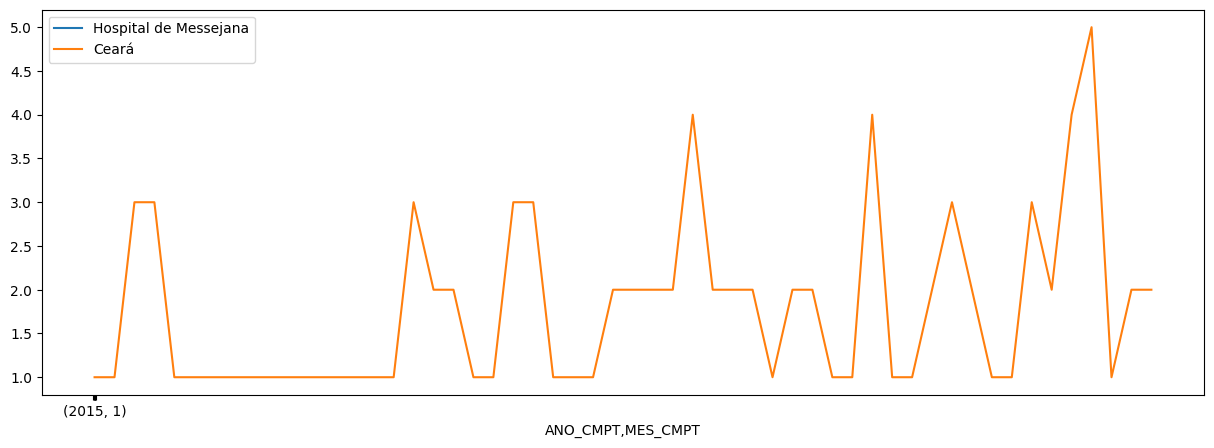

In [16]:
# Gráfico de 2 linha: uma com o total de internações por mes no hospital de messejana e outra com o total de internações por mes no Ceará sem o hospital de messejana
dfHospitalMessejanaCirurgia = dfHospitalMessejana[dfHospitalMessejana['PROC_REA'].isin(filtroCirurgia)]
dfSemMessejanaCirurgia = dfSemMessejana[dfSemMessejana['PROC_REA'].isin(filtroCirurgia)]
dfHospitalMessejanaCirurgia.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
dfSemMessejanaCirurgia.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
plt.legend(['Hospital de Messejana', 'Ceará'])

In [17]:
# Agrupando as internações por hospital e ano para o DataFrame que exclui o Hospital de Messejana
internacoes_por_ano_hospital = dfCirurgia.groupby(['CNES', 'ANO_CMPT']).size().unstack(fill_value=0)

# Ordenando os hospitais pelo total de internações durante o período
internacoes_por_ano_hospital['Total'] = internacoes_por_ano_hospital.sum(axis=1)
internacoes_por_ano_hospital_sorted = internacoes_por_ano_hospital.sort_values(by='Total', ascending=False)

# Removendo a coluna total para melhor visualização dos resultados anuais
internacoes_por_ano_hospital_sorted.drop(columns=['Total'], inplace=True)

internacoes_por_ano_hospital_sorted.head(20)  # Mostrando os top 10 hospitais com maior número total de internações

ANO_CMPT                                         2015  2016  2017  2018  2019  \
CNES                                                                            
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP     0     0     0     0    10   
HOSPITAL UNIVERSITARIO WALTER CANTIDIO             11     1     3     8     5   
HOSPITAL HAROLDO JUACABA                            0     0     0     0     1   
HIAS HOSPITAL INFANTIL ALBERT SABIN                 0     2     0     3     0   
HGF HOSPITAL GERAL DE FORTALEZA                     0     0     0     1     1   
HOSPITAL CURA DARS                                  1     1     0     0     0   
HOSPITAL DISTRITAL DR FERNANDES TAVORA              0     1     0     0     0   
SANTA CASA DE MISERICORDIA DE SOBRAL                0     0     0     0     1   

ANO_CMPT                                         2020  2021  2022  
CNES                                                               
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP     5     7    13  
HOSPITAL UNIVERSITARIO WALTER CANTIDIO              1     0     5  
HOSPITAL HAROLDO JUACABA                            1     4     3  
HIAS HOSPITAL INFANTIL ALBERT SABIN                 2     0     1  
HGF HOSPITAL GERAL DE FORTALEZA                     0     4     1  
HOSPITAL CURA DARS                                  0     0     0  
HOSPITAL DISTRITAL DR FERNANDES TAVORA              0     0     0  
SANTA CASA DE MISERICORDIA DE SOBRAL                0     0     0

# Rede Intercorrências

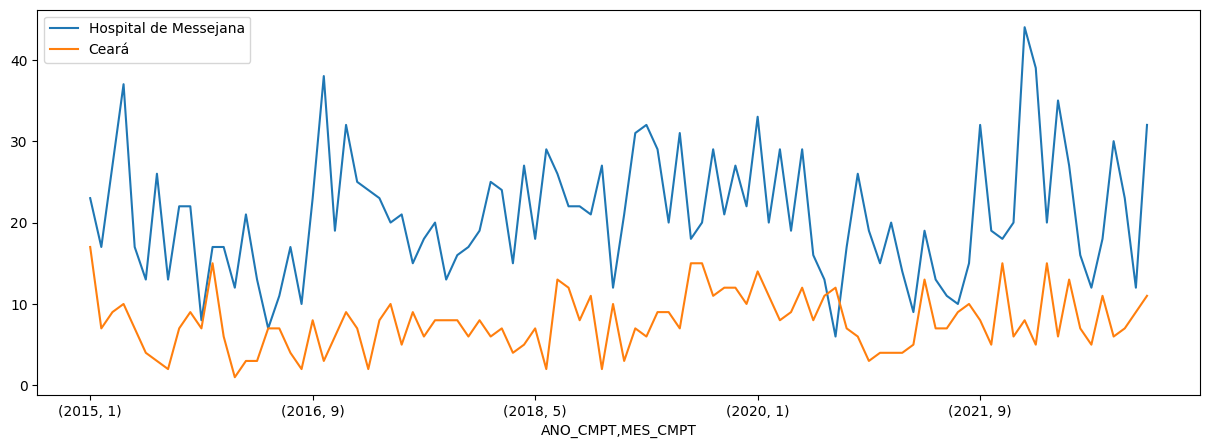

In [18]:
# Gráfico de 2 linha: uma com o total de internações por mes no hospital de messejana e outra com o total de internações por mes no Ceará sem o hospital de messejana
dfHospitalMessejanaIntercorrencia = dfHospitalMessejana[dfHospitalMessejana['PROC_REA'].isin(filtroIntercorrencia)]
dfSemMessejanaIntercorrencia = dfSemMessejana[dfSemMessejana['PROC_REA'].isin(filtroIntercorrencia)]
dfHospitalMessejanaIntercorrencia.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
dfSemMessejanaIntercorrencia.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
plt.legend(['Hospital de Messejana', 'Ceará'])

In [19]:
# Agrupando as internações por hospital e ano para o DataFrame que exclui o Hospital de Messejana
internacoes_por_ano_hospital_Intercorrencia = dfIntercorrencia.groupby(['CNES', 'ANO_CMPT']).size().unstack(fill_value=0)

# Ordenando os hospitais pelo total de internações durante o período
internacoes_por_ano_hospital_Intercorrencia['Total'] = internacoes_por_ano_hospital_Intercorrencia.sum(axis=1)
internacoes_por_ano_hospital_sorted_Intercorrencia = internacoes_por_ano_hospital_Intercorrencia.sort_values(by='Total', ascending=False)

# Removendo a coluna total para melhor visualização dos resultados anuais
internacoes_por_ano_hospital_sorted_Intercorrencia.drop(columns=['Total'], inplace=True)

internacoes_por_ano_hospital_sorted_Intercorrencia.head(20)  # Mostrando os top 10 hospitais com maior número total de internações

ANO_CMPT                                            2015  2016  2017  2018  \
CNES                                                                         
HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUD...   242   220   231   268   
HOSPITAL GERAL DR WALDEMAR ALCANTARA                  31    14    11    15   
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP        2     5    13     4   
SANTA CASA DE MISERICORDIA DE SOBRAL                   0     0     0     0   
CRIO CENTRO REGIONAL INTEGRADO DE ONCOLOGIA           17     7    11     3   
HOSPITAL REGIONAL NORTE                               16     2     1     6   
HOSPITAL HAROLDO JUACABA                               6     5     1     2   
HOSPITAL DR ALBERTO FEITOSA LIMA                       0     1     8     7   
HOSPITAL E MATERNIDADE REGIONAL SAO FRANCISCO          1     0     2     2   
HOSP MUNICIPAL DR ARGEU BRAGA HERBSTER                 3     0     6     6   
HOSPITAL UNIVERSITARIO WALTER CANTIDIO                 1     0     3     2   
HOSPITAL SAO LUCAS                                     0     2     3    10   
HOSPITAL SAO RAIMUNDO                                  0     0     1     3   
HOSPITAL MATERNIDADE NOSSA SENHORA DA EXPECTACAO       2     2     6     1   
HOSPITAL E CASA DE SAUDE DE RUSSAS                     0     3     1     3   
HOSPITAL DISTRITAL EVANDRO AYRES DE MOURA ANTON...     0     1     1     0   
CASA DE SAUDE MATERNIDADE CELESTINA COLARES            0     1     0     1   
HGF HOSPITAL GERAL DE FORTALEZA                        3     3     2     2   
HOSPITAL REGIONAL DR PONTES NETO                       0     0     0     0   
HOSPITAL MUNICIPAL JOSE GONCALVES ROSA                 1     1     3     1   

ANO_CMPT                                            2019  2020  2021  2022  
CNES                                                                        
HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUD...   301   242   200   308  
HOSPITAL GERAL DR WALDEMAR ALCANTARA                  17    11    15     7  
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP       17    19    25    17  
SANTA CASA DE MISERICORDIA DE SOBRAL                  16    29    15     7  
CRIO CENTRO REGIONAL INTEGRADO DE ONCOLOGIA            3     2     0     0  
HOSPITAL REGIONAL NORTE                                3     0     0     3  
HOSPITAL HAROLDO JUACABA                               1     5     6     4  
HOSPITAL DR ALBERTO FEITOSA LIMA                       3     3     1     5  
HOSPITAL E MATERNIDADE REGIONAL SAO FRANCISCO          6     4     2     6  
HOSP MUNICIPAL DR ARGEU BRAGA HERBSTER                 2     4     1     0  
HOSPITAL UNIVERSITARIO WALTER CANTIDIO                 2     3     4     5  
HOSPITAL SAO LUCAS                                     4     0     0     1  
HOSPITAL SAO RAIMUNDO                                  9     1     2     2  
HOSPITAL MATERNIDADE NOSSA SENHORA DA EXPECTACAO       0     1     1     3  
HOSPITAL E CASA DE SAUDE DE RUSSAS                     1     1     0     6  
HOSPITAL DISTRITAL EVANDRO AYRES DE MOURA ANTON...     4     3     1     1  
CASA DE SAUDE MATERNIDADE CELESTINA COLARES            3     0     3     3  
HGF HOSPITAL GERAL DE FORTALEZA                        0     0     0     0  
HOSPITAL REGIONAL DR PONTES NETO                       0     0     2     8  
HOSPITAL MUNICIPAL JOSE GONCALVES ROSA                 1     1     1     0

# Tratamento Clinico

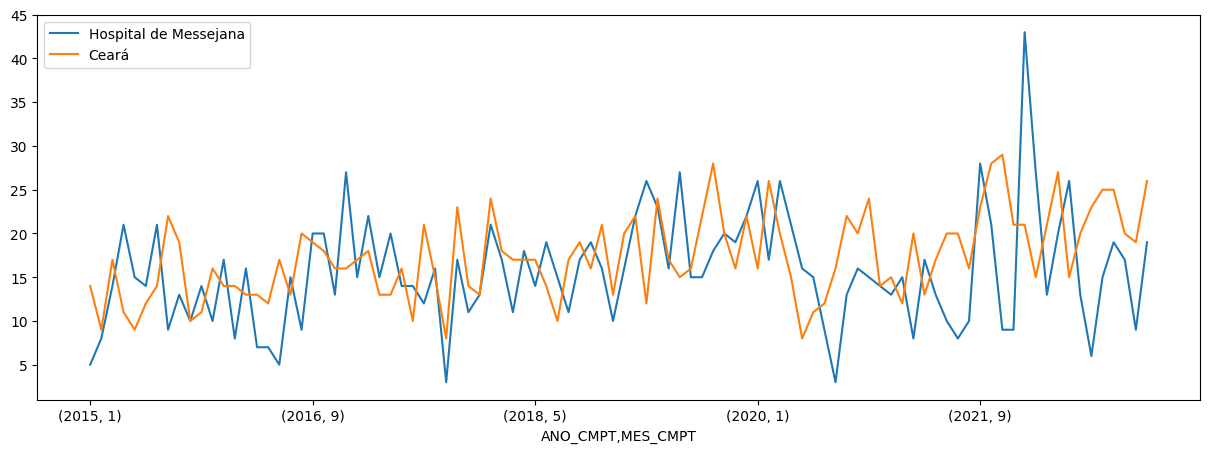

In [20]:
# Gráfico de 2 linha: uma com o total de internações por mes no hospital de messejana e outra com o total de internações por mes no Ceará sem o hospital de messejana
dfHospitalMessejanaTratamentoClinico = dfHospitalMessejana[dfHospitalMessejana['PROC_REA'].isin(filtroTratamentoClinico)]
dfSemMessejanaTratamentoClinico = dfSemMessejana[dfSemMessejana['PROC_REA'].isin(filtroTratamentoClinico)]
dfHospitalMessejanaTratamentoClinico.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
dfSemMessejanaTratamentoClinico.groupby(['ANO_CMPT','MES_CMPT']).size().plot(kind='line', figsize=(15,5))
plt.legend(['Hospital de Messejana', 'Ceará'])

In [21]:
# Agrupando as internações por hospital e ano para o DataFrame que exclui o Hospital de Messejana
internacoes_por_ano_hospital_TratamentoClinico = dfTratamentoClinico.groupby(['CNES', 'ANO_CMPT']).size().unstack(fill_value=0)

# Ordenando os hospitais pelo total de internações durante o período
internacoes_por_ano_hospital_TratamentoClinico['Total'] = internacoes_por_ano_hospital_TratamentoClinico.sum(axis=1)
internacoes_por_ano_hospital_sorted_TratamentoClinico = internacoes_por_ano_hospital_TratamentoClinico.sort_values(by='Total', ascending=False)

# Removendo a coluna total para melhor visualização dos resultados anuais
internacoes_por_ano_hospital_sorted_TratamentoClinico.drop(columns=['Total'], inplace=True)

internacoes_por_ano_hospital_sorted_TratamentoClinico.head(20)  # Mostrando os top 10 hospitais com maior número total de internações

ANO_CMPT                                            2015  2016  2017  2018  \
CNES                                                                         
HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUD...   154   164   172   188   
HGCC HOSPITAL GERAL DR CESAR CALS                     38    31    18    23   
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP        9     9     9    28   
HOSPITAL HAROLDO JUACABA                               8    21    23    39   
HGF HOSPITAL GERAL DE FORTALEZA                       13    12     6    12   
HOSPITAL E CASA DE SAUDE DE RUSSAS                     9    12    23    16   
SANTA CASA DE MISERICORDIA DE SOBRAL                  15    20    13    16   
HOSPITAL UNIVERSITARIO WALTER CANTIDIO                 9    15    13     7   
HOSPITAL REGIONAL DE IGUATU                            7    11    14    10   
HOSPITAL DISTRITAL DR FERNANDES TAVORA                 0     0     0     0   
HOSPITAL SAO RAIMUNDO                                  0     0     0     3   
HOSPITAL REGIONAL DO CARIRI                            2     1     2     1   
HOSPITAL MUNICIPAL DR JOAO ELISIO DE HOLANDA           8     5     7     6   
CRIO CENTRO REGIONAL INTEGRADO DE ONCOLOGIA            9     4     4     2   
CASA DE SAUDE ADILIA MARIA                             2     7     5     1   
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO              1     2     3     2   
HOSPITAL MATERNIDADE MADALENA NUNES                    0     3     4     3   
HOSPITAL REGIONAL NORTE                                6     1     3     1   
HOSPITAL DISTRITAL NOSSA SENHORA DA CONCEICAO          0     0     0     4   
HOSP MUN ABELARDO GADELHA DA ROCHA                     0     0     1     2   

ANO_CMPT                                            2019  2020  2021  2022  
CNES                                                                        
HM HOSPITAL DE MESSEJANA DR CARLOS ALBERTO STUD...   239   191   161   227  
HGCC HOSPITAL GERAL DR CESAR CALS                     22    22    23    28  
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO HMSVP       26    22    40    37  
HOSPITAL HAROLDO JUACABA                              41    25    10     8  
HGF HOSPITAL GERAL DE FORTALEZA                        9    14    28    33  
HOSPITAL E CASA DE SAUDE DE RUSSAS                    13    14    16    16  
SANTA CASA DE MISERICORDIA DE SOBRAL                  11    11     4     8  
HOSPITAL UNIVERSITARIO WALTER CANTIDIO                10     4    10     7  
HOSPITAL REGIONAL DE IGUATU                            8     2     7     7  
HOSPITAL DISTRITAL DR FERNANDES TAVORA                 6    10    11    13  
HOSPITAL SAO RAIMUNDO                                  4     7     7    15  
HOSPITAL REGIONAL DO CARIRI                            8     7     9     5  
HOSPITAL MUNICIPAL DR JOAO ELISIO DE HOLANDA           2     3     1     1  
CRIO CENTRO REGIONAL INTEGRADO DE ONCOLOGIA            1     6     2     1  
CASA DE SAUDE ADILIA MARIA                             0     4     5     1  
HOSPITAL MATERNIDADE SAO VICENTE DE PAULO              5     5     4     1  
HOSPITAL MATERNIDADE MADALENA NUNES                    5     3     1     1  
HOSPITAL REGIONAL NORTE                                4     1     2     0  
HOSPITAL DISTRITAL NOSSA SENHORA DA CONCEICAO          6     3     2     3  
HOSP MUN ABELARDO GADELHA DA ROCHA                     3     3     2     5